In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set(font_scale=1.5)

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [4]:
df_merge = df_transactions.merge(df_offers, how='left', on='offer_id')
df_merge.head()

,customer_name,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak
0,Smith,2,1,January,Pinot Noir,72,17,France,False
1,Smith,24,1,September,Pinot Noir,6,34,Italy,False
2,Johnson,17,1,July,Pinot Noir,12,47,Germany,False
3,Johnson,24,1,September,Pinot Noir,6,34,Italy,False
4,Johnson,26,1,October,Pinot Noir,144,83,Australia,False


In [5]:
data = df_merge.pivot_table(index='customer_name', columns=['offer_id'], values='n')
data = data.fillna(0).reset_index()

for i in range(1,33):
    data[i]=data[i].astype(int)
#data.resetindex()
data.head()
#data.info()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
x_cols = data.columns[1:]
X = data[x_cols]

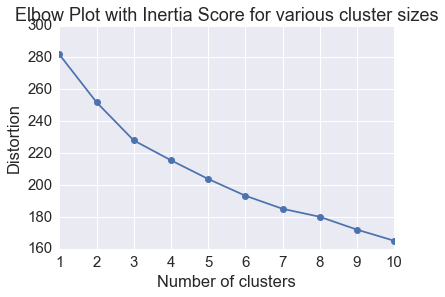

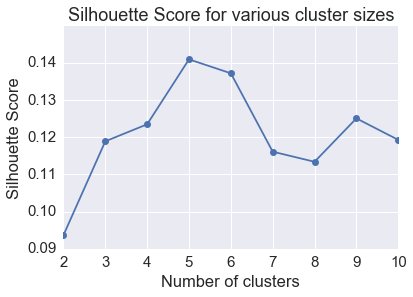

In [7]:
cdata = pd.DataFrame()
from sklearn import metrics
from sklearn.cluster import KMeans
sil_scores = []
distortions = []
for i in range (1,11):
    km = KMeans(n_clusters=i,random_state=10,verbose=0)
#    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    Y = km.fit_predict(X)
    cdata[i] = Y 
#    print("#Clusters = " + str(i))
#    print(cdata[i].value_counts())
#    print("Inertia = " +str(km.inertia_))
    distortions.append(km.inertia_)
    if (i>=2):
        sc = (metrics.silhouette_score(X, Y))
        sil_scores.append(sc)
#        print("Silhouette Score = " +str(sc))

plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title("Elbow Plot with Inertia Score for various cluster sizes")
plt.show()


plt.plot(range(2,11), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title("Silhouette Score for various cluster sizes")
plt.show()

## Based on the elbow plot of distion the optimal value of K seems to be 3 . The silhouette score seems to indicate optimal value of 5 for the number of clusters . Lets look at the clusters for both K=3 and K=5 below

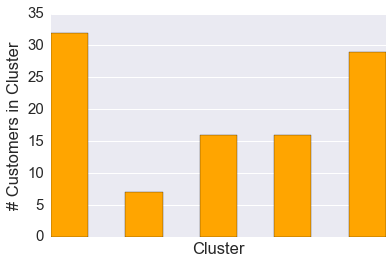

In [8]:
bar_width = 0.5 
 
#print('SS is %.3f.' % round(km.inertia_,4))
plt.bar(cdata[5].unique(),cdata[5].value_counts(),color='orange',width=bar_width)

plt.xticks([])
plt.xlabel('Cluster')
plt.ylabel('# Customers in Cluster')
plt.show()

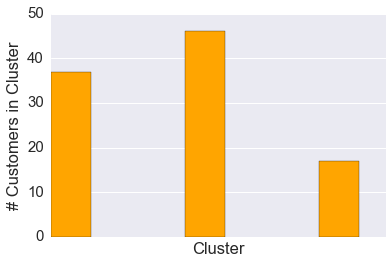

In [9]:
bar_width = 0.3 
plt.bar(cdata[3].unique(),cdata[3].value_counts(),color='orange',width=bar_width)
plt.xticks([])
plt.xlabel('Cluster')
plt.ylabel('# Customers in Cluster')
plt.show()



##  Lets look at the silhouette coefficients/score for various values of K 

For n_clusters = 2 The average silhouette_score is : 0.09365573283492713


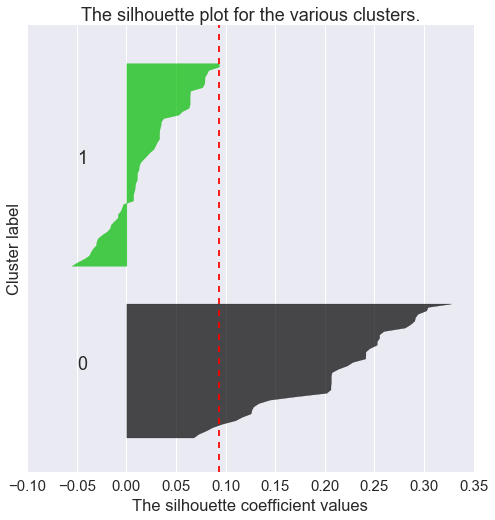

For n_clusters = 4 The average silhouette_score is : 0.12347053919571699


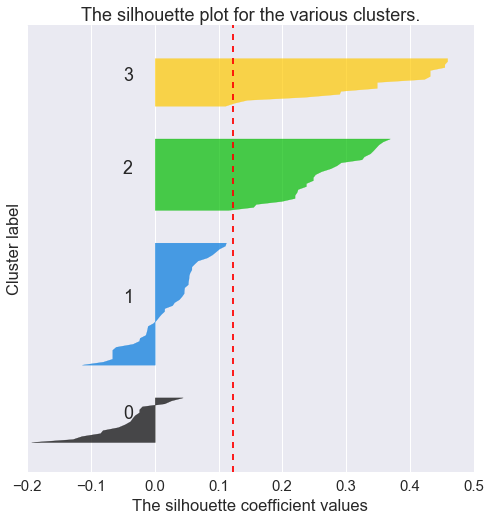

For n_clusters = 6 The average silhouette_score is : 0.1371798939109807


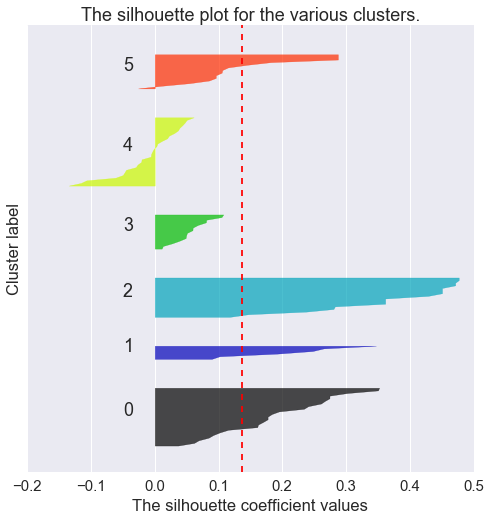

For n_clusters = 8 The average silhouette_score is : 0.11339573832632867


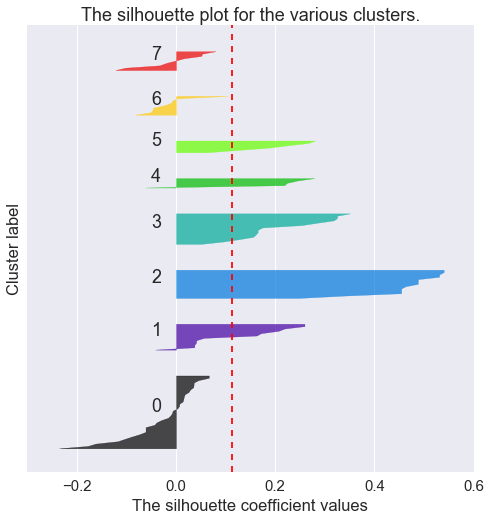

For n_clusters = 10 The average silhouette_score is : 0.11928332134753233


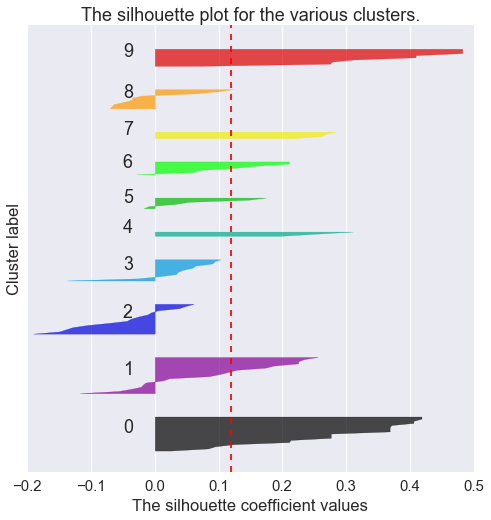

In [10]:
import matplotlib.cm as cm
import numpy as np

pdata = pd.DataFrame()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pdata['x']=pca.fit_transform(X)[:,0]
pdata['y']=pca.fit_transform(X)[:,1]

clusterset = [2,4,6,8,10]

s_score = []

for n_clusters in clusterset:
    # Create a subplot with 1 row and 2 columns
#    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8,8)

    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    km = KMeans(n_clusters=n_clusters, random_state=10)
    Y = km.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(X, Y)
    s_score.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(X, Y)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[Y == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks

    plt.show()

## Cluster Analysis with PCA

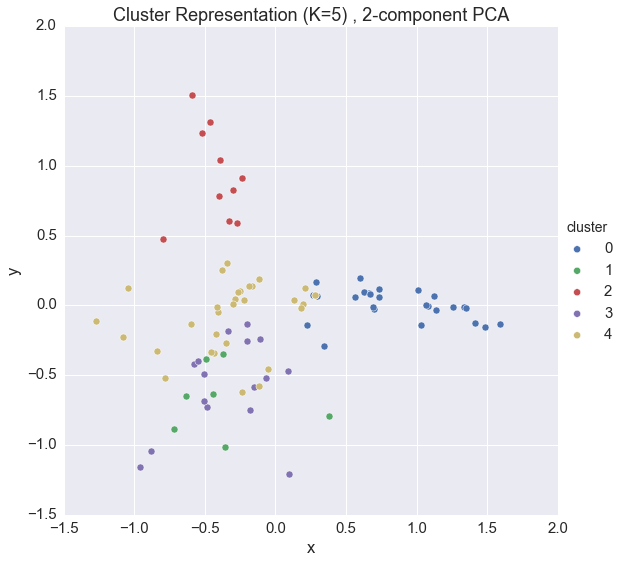

In [11]:
from sklearn.decomposition import PCA

cc5 = pd.DataFrame()
cc5['customer'] = data['customer_name']
cc5['cluster'] = cdata[5] # Use the cluster values from 


pca = PCA(n_components=2)

cc5['x'] = pca.fit_transform(X)[:,0]
cc5['y'] = pca.fit_transform(X)[:,1]

kws = dict(s=50, linewidth=.5, edgecolor="w")


markers = ['o','v','d','s','o']
sns.pairplot(cc5, x_vars='x',y_vars='y',hue="cluster",size=8,plot_kws=kws)

plt.title('Cluster Representation (K=5) , 2-component PCA')
plt.show()

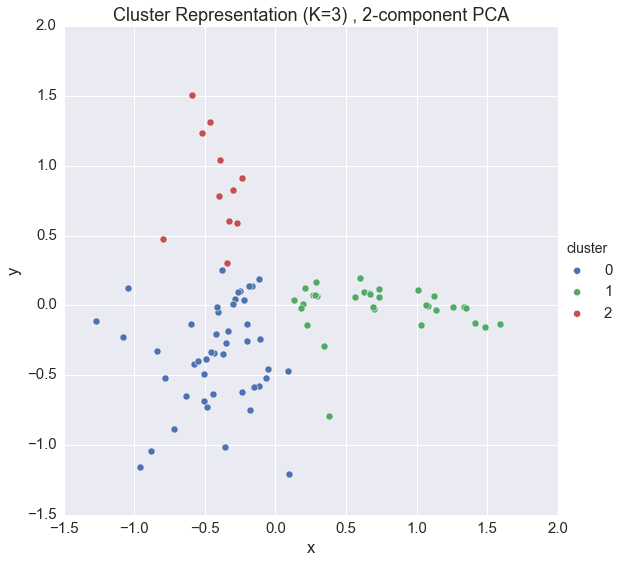

In [12]:
cc3 = pd.DataFrame()
cc3['customer'] = data['customer_name']
cc3['cluster'] = cdata[3]

pca = PCA(n_components=2)

cc3['x'] = pca.fit_transform(X)[:,0]
cc3['y'] = pca.fit_transform(X)[:,1]

kws = dict(s=50, linewidth=.5, edgecolor="w")
#markers = ['o','v','d']
#,plot_kws={"s": 1}
sns.pairplot(cc3, x_vars='x',y_vars='y',hue="cluster",size=8,plot_kws=kws)

plt.title('Cluster Representation (K=3) , 2-component PCA')
plt.show()

### From the cluster map , we see that k=3 and two principal components seems to be better than when k=5.

## Dimension Analysis with PCA 
We look at optimal value for PCA dimension , using the elbow plot and explained variance with various N

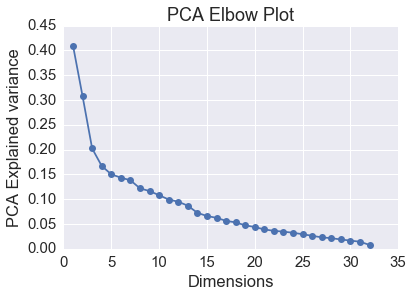

In [13]:
pca = PCA(n_components=32)
pca.fit(X)
fig.set_size_inches(10,10)
plt.plot(range(1,33), pca.explained_variance_, marker='o')
plt.xlabel('Dimensions')
plt.ylabel('PCA Explained variance')
plt.title('PCA Elbow Plot');
plt.show()

### Using the elbow plot, we see optimal values of 3 , 4, 5 for the number of components   for PCA.

## Clustering with AffinityPropagation 

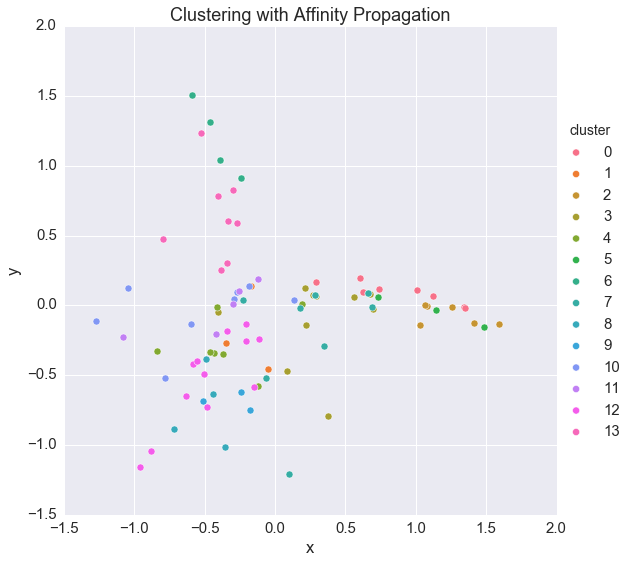

In [14]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()

apd = pd.DataFrame()
apd['customer'] = data['customer_name']
apd['cluster'] = ap.fit_predict(X)

pca = PCA(n_components=2)

apd['x'] = pca.fit_transform(X)[:,0]
apd['y'] = pca.fit_transform(X)[:,1]

sns.pairplot(apd, x_vars='x',y_vars='y',hue="cluster",size=8,plot_kws=kws)

plt.title('Clustering with Affinity Propagation')
plt.show()



### Clustering with Affinity Propagation  gives us 14 clusters (with a significant overlap as seen in the custermap above).

## Clustering with Spectral Clustering 

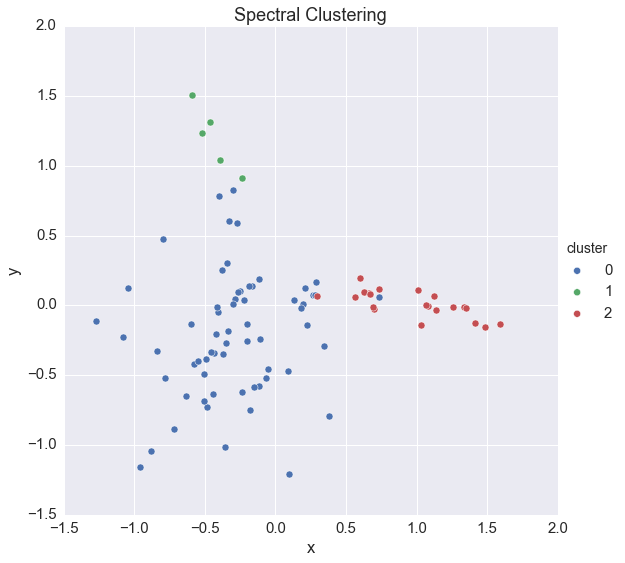

In [15]:
# Try spectral clustering

from sklearn.cluster import SpectralClustering

scg = SpectralClustering(n_clusters=3)

sc = pd.DataFrame()
sc['customer'] = data['customer_name']
sc['cluster'] = scg.fit_predict(X)

pca = PCA(n_components=2)

sc['x'] = pca.fit_transform(X)[:,0]
sc['y'] = pca.fit_transform(X)[:,1]


sns.pairplot(sc, x_vars='x',y_vars='y',hue="cluster",size=8,plot_kws=kws)

plt.title('Spectral Clustering')
plt.show()


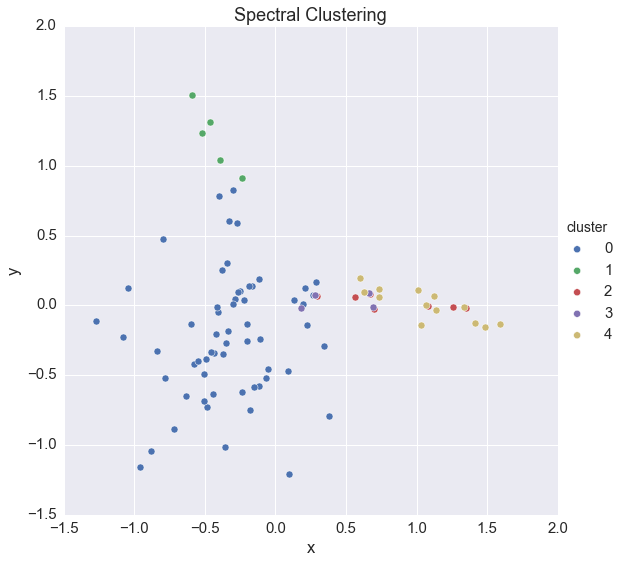

In [16]:
# Try spectral clustering

from sklearn.cluster import SpectralClustering

scg = SpectralClustering(n_clusters=5)

sc5 = pd.DataFrame()
sc5['customer'] = data['customer_name']
sc5['cluster'] = scg.fit_predict(X)

pca = PCA(n_components=2)

sc5['x'] = pca.fit_transform(X)[:,0]
sc5['y'] = pca.fit_transform(X)[:,1]


sns.pairplot(sc5, x_vars='x',y_vars='y',hue="cluster",size=8,plot_kws=kws)

plt.title('Spectral Clustering')
plt.show()



### From the clustermap / PCA of  spectral clustering (for both k=3 and k=5) we see that the separation is poor compared to the K-means 

## Clustering with Agglomerative Clustering 

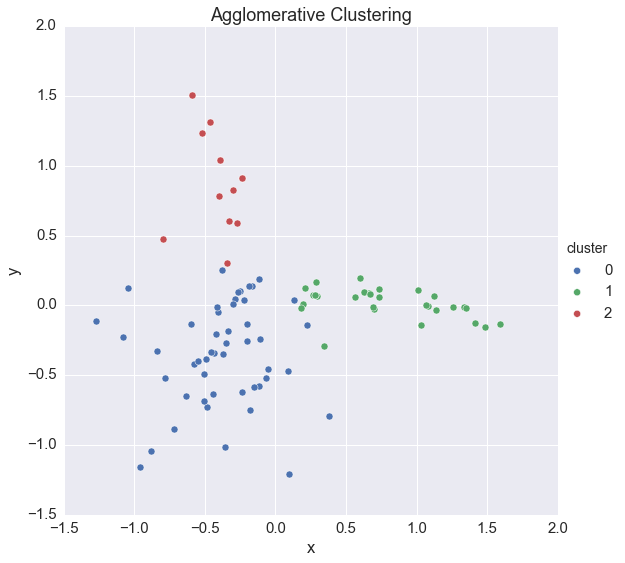

In [17]:
from sklearn.cluster import AgglomerativeClustering

acg = AgglomerativeClustering(n_clusters=3)

ac = pd.DataFrame()
ac['customer'] = data['customer_name']
ac['cluster'] = acg.fit_predict(X)

pca = PCA(n_components=2)

ac['x'] = pca.fit_transform(X)[:,0]
ac['y'] = pca.fit_transform(X)[:,1]

sns.pairplot(ac, x_vars='x',y_vars='y',hue="cluster",size=8,plot_kws=kws)

plt.title('Agglomerative Clustering')
plt.show()


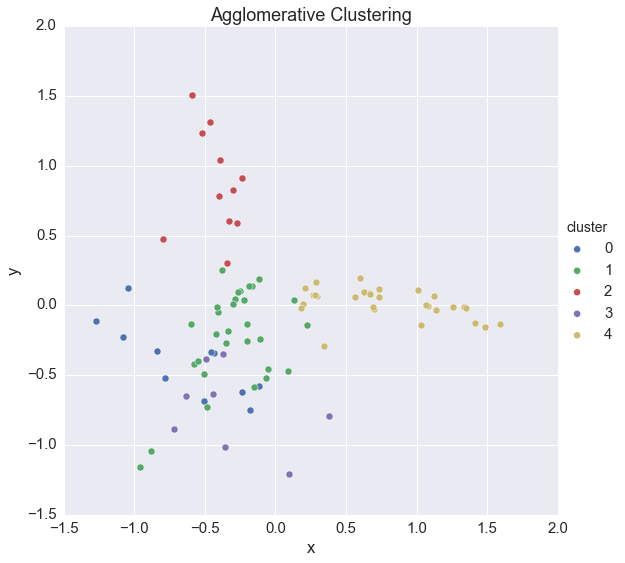

In [18]:
from sklearn.cluster import AgglomerativeClustering

acg = AgglomerativeClustering(n_clusters=5)

ac5 = pd.DataFrame()
ac5['customer'] = data['customer_name']
ac5['cluster'] = acg.fit_predict(X)

pca = PCA(n_components=2)

ac5['x'] = pca.fit_transform(X)[:,0]
ac5['y'] = pca.fit_transform(X)[:,1]

sns.pairplot(ac5, x_vars='x',y_vars='y',hue="cluster",size=8,plot_kws=kws)

plt.title('Agglomerative Clustering')
plt.show()



### Agglomerative clustering seems to be better than spectral clustering.But  the data is not as well separated as with K-Means clustering.

## Clustering with DBSCAN 

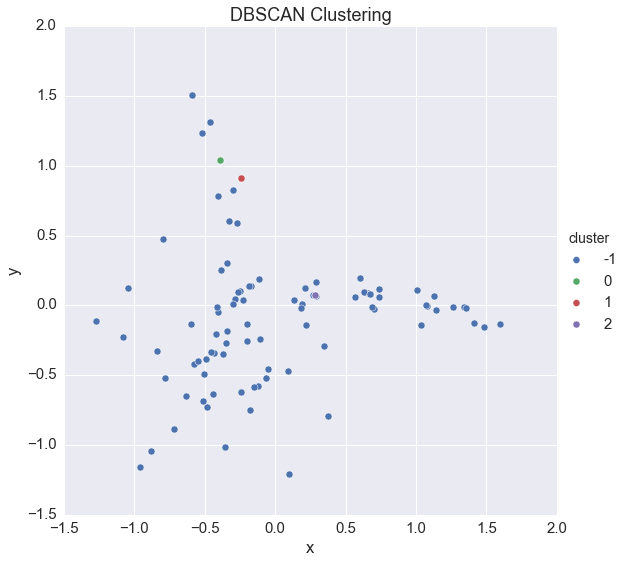

In [19]:
# Try DBSCAN

from sklearn.cluster import DBSCAN

dbs = DBSCAN(min_samples=3)

db = pd.DataFrame()
db['customer'] = data['customer_name']
db['cluster'] = dbs.fit_predict(X)

pca = PCA(n_components=2)

db['x'] = pca.fit_transform(X)[:,0]
db['y'] = pca.fit_transform(X)[:,1]


sns.pairplot(db, x_vars='x',y_vars='y',hue="cluster",size=8,plot_kws=kws)

plt.title('DBSCAN Clustering')
plt.show()


### Using DBSCAN we have  4 distinct clusters , however the clusters are not separated well . 


## Summary 
Based on the cluster map for various clustering algorithms we can conclude K-Means clustering provides us the most clear separation of clusters with PCA (2-components) 
